In [4]:
import json
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os
from PIL import Image
from glob import glob
import cv2
import numpy as np
import pandas as pd

%matplotlib ipympl
# %matplotlib inline

/tmp/ipykernel_91364/2750904101.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])


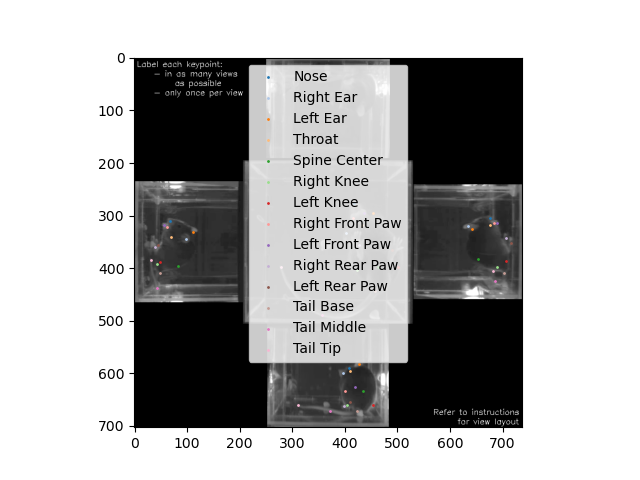

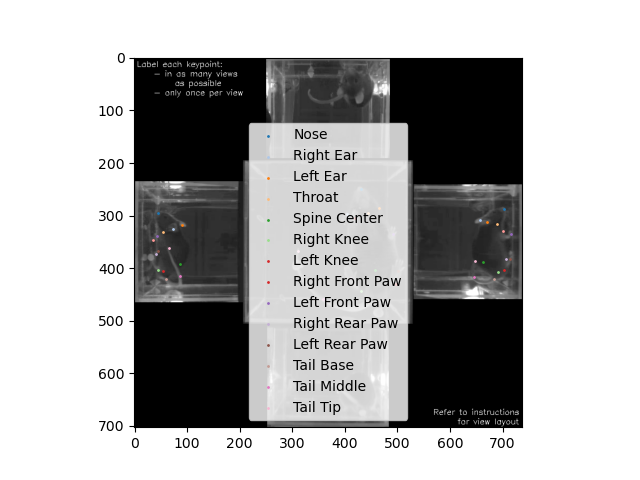

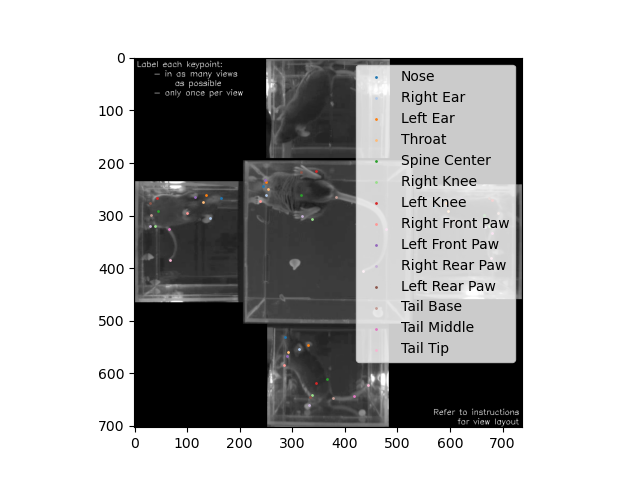

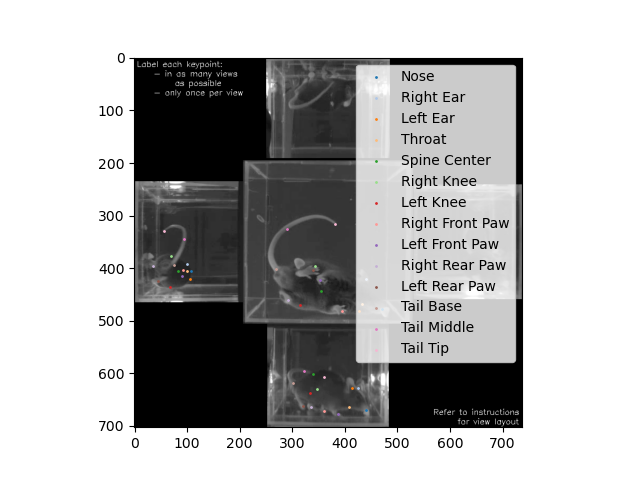

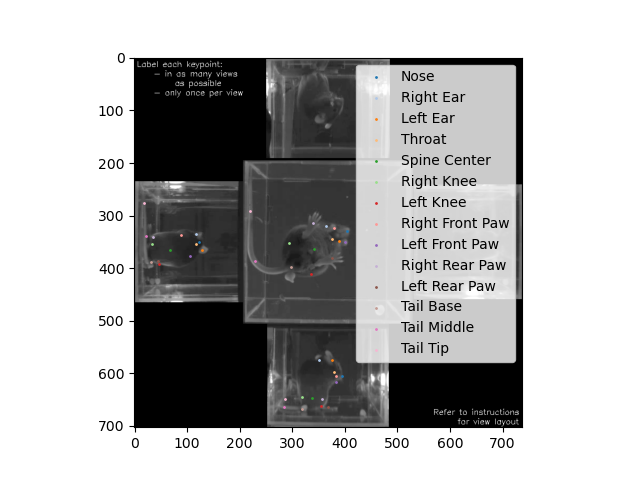

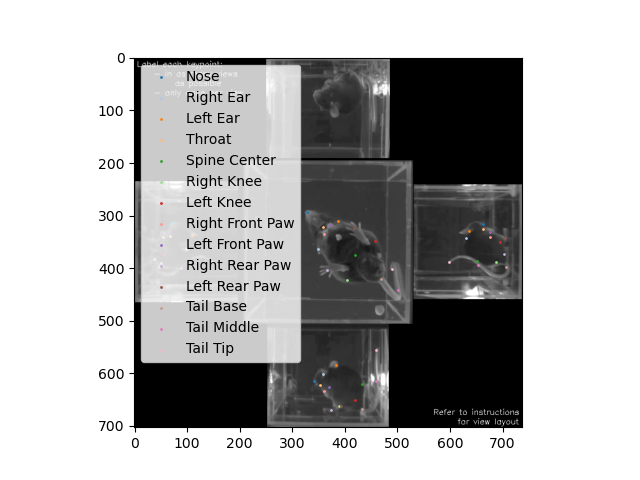

In [8]:
# image_dir = '/home/klb807/MARS_project/3d/annotation_data/raw_images'
# fid = open('/home/klb807/MARS_project/3d/annotation_data/output.manifest')
image_dir = '/home/klb807/Documents/AWS_labeling_setup'
fid = open('/home/klb807/Documents/AWS_labeling_setup/output.manifest', 'r')

labels = ['Nose','Right Ear','Left Ear', 'Throat', 'Spine Center', 'Right Knee', 'Left Knee', 'Right Front Paw', 'Left Front Paw', 'Right Rear Paw', 'Left Rear Paw', 'Tail Base', 'Tail Middle', 'Tail Tip']
cmap = colormaps['tab20'].colors

color_dict = {labels[ii]:cmap[ii] for ii in range(len(labels))}


# fig,ax = plt.subplots(ncols=3, nrows=4)
for i_line,line in enumerate(fid.readlines()):
    if i_line > 5:
        break

    fig,ax = plt.subplots()
    # set up image file path
    image_path = os.path.join(image_dir,os.path.split(json.loads(line)['source-ref'])[-1])
    
    # pull out the keypoints
    im_array = Image.open(image_path)
    ax.imshow(im_array)
    

    data = json.loads(line)['annotatedResult']
    for worker_label in data['annotationsFromAllWorkers']:
        sub_data = eval(worker_label['annotationData']['content'])
        for label in sub_data['annotatedResult']['keypoints']:
            ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])

        ax.legend(color_dict)
            
    fig.savefig(os.path.splitext(image_path)[0] + '_labeled.png', dpi=300)


fid.close()

In [40]:
image_list = [item for file in ['*.jpg','*.tiff','*.png'] for item in glob(os.path.join(image_dir,file))]

In [41]:
for image_fn in image_list:
    image = cv2.imread(image_fn)
    

['/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001303_labeled.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004497_labeled.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004536.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001943.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001303.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001993.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004497.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001943_labele

In [108]:
# pd.DataFrame.from_dict(data)
data

{'annotationsFromAllWorkers': [{'workerId': 'vendor.us-east-2.d90f632b1e2dfc2b', 'annotationData': {'content': '{"annotatedResult":{"inputImageProperties":{"height":712,"width":738},"keypoints":[{"label":"Nose","x":409,"y":394},{"label":"Right Ear","x":390,"y":364},{"label":"Left Ear","x":429,"y":367},{"label":"Throat","x":413,"y":361},{"label":"Spine Center","x":423,"y":284},{"label":"Right Hip","x":375,"y":266},{"label":"Left Hip","x":470,"y":273},{"label":"Right Front Paw","x":413,"y":340},{"label":"Left Front Paw","x":424,"y":345},{"label":"Right Rear Paw","x":373,"y":287},{"label":"Left Rear Paw","x":463,"y":299},{"label":"Tail Base","x":423,"y":225},{"label":"Tail Middle","x":315,"y":210},{"label":"Tail Tip","x":219,"y":261},{"label":"Nose","x":402,"y":662},{"label":"Right Ear","x":414,"y":611},{"label":"Left Ear","x":382,"y":607},{"label":"Throat","x":402,"y":665},{"label":"Spine Center","x":402,"y":595},{"label":"Right Hip","x":433,"y":646},{"label":"Left Hip","x":371,"y":644},

In [102]:
with open('/home/klb807/Documents/AWS_labeling_setup/boundaries.txt') as fid:
    output_dict = {line.split(':')[0]:eval(line.split(':')[1]) for line in fid.readlines()}

In [105]:
boundary = output_dict[list(output_dict.keys())[0]]

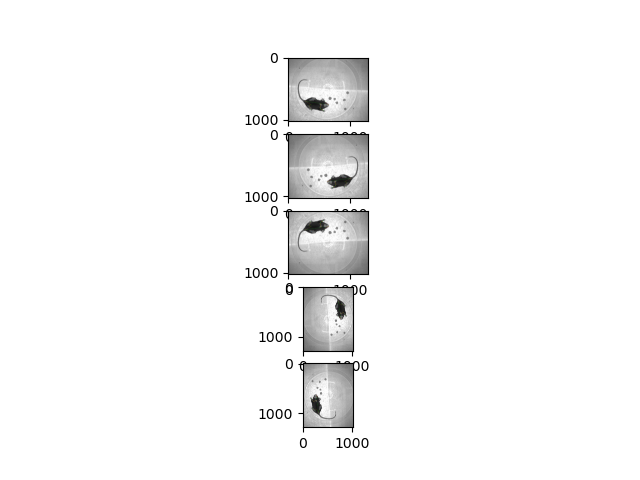

In [96]:
im = cv2.imread('/home/klb807/Downloads/Basler_acA1300-60gm__24254439__20230330_144351078_0000.tiff')
fig,ax = plt.subplots(nrows=5)

# print(im[:,:,np.newaxis])
ax[0].imshow(im)

# # flip horizontally - "south" view
ax[1].imshow(im[:,::-1])
# print(im[:,::-1])

# # flip vertically - 'north' view
ax[2].imshow(im[::-1,:])
# print(im[::-1])

# # transpose - 'east' view
# print(im[:,:,np.newaxis].transpose((1,0,2)))
ax[3].imshow(im.transpose((1,0,2)))

# flip, transpose, flip - 'west' view
# print(im[::-1].T[::-1])
ax[4].imshow(im[::-1].transpose((1,0,2))[::-1])

# print(np.matmul(im,np.eye(im.shape[0])[::-1]))